In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=False,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))
        
        if len(cf) == 2:
            # For Binary Confusion Matrices: compute metrics for each class.
            # For positive class (class 1)
            precision_pos = cf[1, 1] / (cf[0, 1] + cf[1, 1]) if (cf[0, 1] + cf[1, 1]) > 0 else 0
            recall_pos    = cf[1, 1] / (cf[1, 0] + cf[1, 1]) if (cf[1, 0] + cf[1, 1]) > 0 else 0
            f1_score_pos  = 2 * ((precision_pos * recall_pos) / (precision_pos + recall_pos)) if (precision_pos + recall_pos) > 0 else 0

            # For negative class (class 0)
            precision_neg = cf[0, 0] / (cf[0, 0] + cf[1, 0]) if (cf[0, 0] + cf[1, 0]) > 0 else 0
            recall_neg    = cf[0, 0] / (cf[0, 0] + cf[0, 1]) if (cf[0, 0] + cf[0, 1]) > 0 else 0
            f1_score_neg  = 2 * ((precision_neg * recall_neg) / (precision_neg + recall_neg)) if (precision_neg + recall_neg) > 0 else 0

            # Macro F1: average of the F1 scores for each class
            f1_score_macro = (f1_score_pos + f1_score_neg) / 2

            stats_text = "\n\nAccuracy={:0.3f}\nPrecision (pos)={:0.3f}\nRecall (pos)={:0.3f}\nF1 Score (pos)={:0.3f}\nF1 Score (macro)={:0.3f}".format(
                accuracy, precision_pos, recall_pos, f1_score_pos, f1_score_macro)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        categories = False

    # Use a local context manager to increase font sizes only for this figure.
    with sns.plotting_context("notebook", font_scale=1.5):
        plt.figure(figsize=figsize)
        # Pass annot_kws to increase the annotation font size.
        sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar,
                    xticklabels=categories, yticklabels=categories,
                    annot_kws={"size": 24})
        if xyplotlabels:
            plt.ylabel('True label', fontsize=18)
            plt.xlabel('Predicted label' + stats_text, fontsize=18)
        else:
            plt.xlabel(stats_text, fontsize=18)
    
        if title:
            plt.title(title, fontsize=20)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# make_confusion_matrix(confusion_array, title="Confusion Matrix")


Extracting parameters from /home/s.dharia-ra/Shyamal/PEARL/sub-01/eeg/sub-01_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 661519  =      0.000 ...   661.519 secs...


Found 127 sensors.
Original grad_dict has 51 entries.
After merging duplicates, we have 51 unique subjects in grad_dict.
Subject 1 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 1 (key=1.npz, subject_number=1) with 9 samples:
  Gradient shape = torch.Size([9, 256, 6, 48]), preds shape = torch.Size([9])
Subject 1 skipped due to insufficient correct predictions.
Subject 10 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 2 (key=10.npz, subject_number=10) with 9 samples:
  Gradient shape = torch.Size([9, 256, 6, 48]), preds shape = torch.Size([9])
Subject 10 skipped due to insufficient correct predictions.
Subject 11 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 3 (key=11.npz, subject_number=11) with 9 samples:
  Gradient shape = torch.Size([9, 256, 6, 48]), preds shape = torch.Size([9])
Subject 11 skipped due to insufficient correct predictions.
Subject 13 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 4 (key=13.npz, subject_number=13) with 9 sa

/tmp/ipykernel_1946712/951991038.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  csv_data = csv_data.groupby('Group', group_keys=False).apply(


Subject 72 predictions: [1 1 1 1 1 1 1 1 1]
Processing subject index 41 (key=72.npz, subject_number=72) with 9 samples:
  Gradient shape = torch.Size([9, 256, 6, 48]), preds shape = torch.Size([9])
Subject 72 original heatmap shape: torch.Size([1, 1, 6, 48])
Subject 72 upsampled heatmap shape: torch.Size([127, 48])
Subject 73 predictions: [1 1 1 1 1 1 1 1 1]
Processing subject index 42 (key=73.npz, subject_number=73) with 9 samples:
  Gradient shape = torch.Size([9, 256, 6, 48]), preds shape = torch.Size([9])
Subject 73 original heatmap shape: torch.Size([1, 1, 6, 48])
Subject 73 upsampled heatmap shape: torch.Size([127, 48])
Subject 74 predictions: [1 1 1 1 1 1 1 1 1]
Processing subject index 43 (key=74.npz, subject_number=74) with 9 samples:
  Gradient shape = torch.Size([9, 256, 6, 48]), preds shape = torch.Size([9])
Subject 74 original heatmap shape: torch.Size([1, 1, 6, 48])
Subject 74 upsampled heatmap shape: torch.Size([127, 48])
Subject 75 predictions: [1 1 1 1 1 1 1 1 1]
Proce

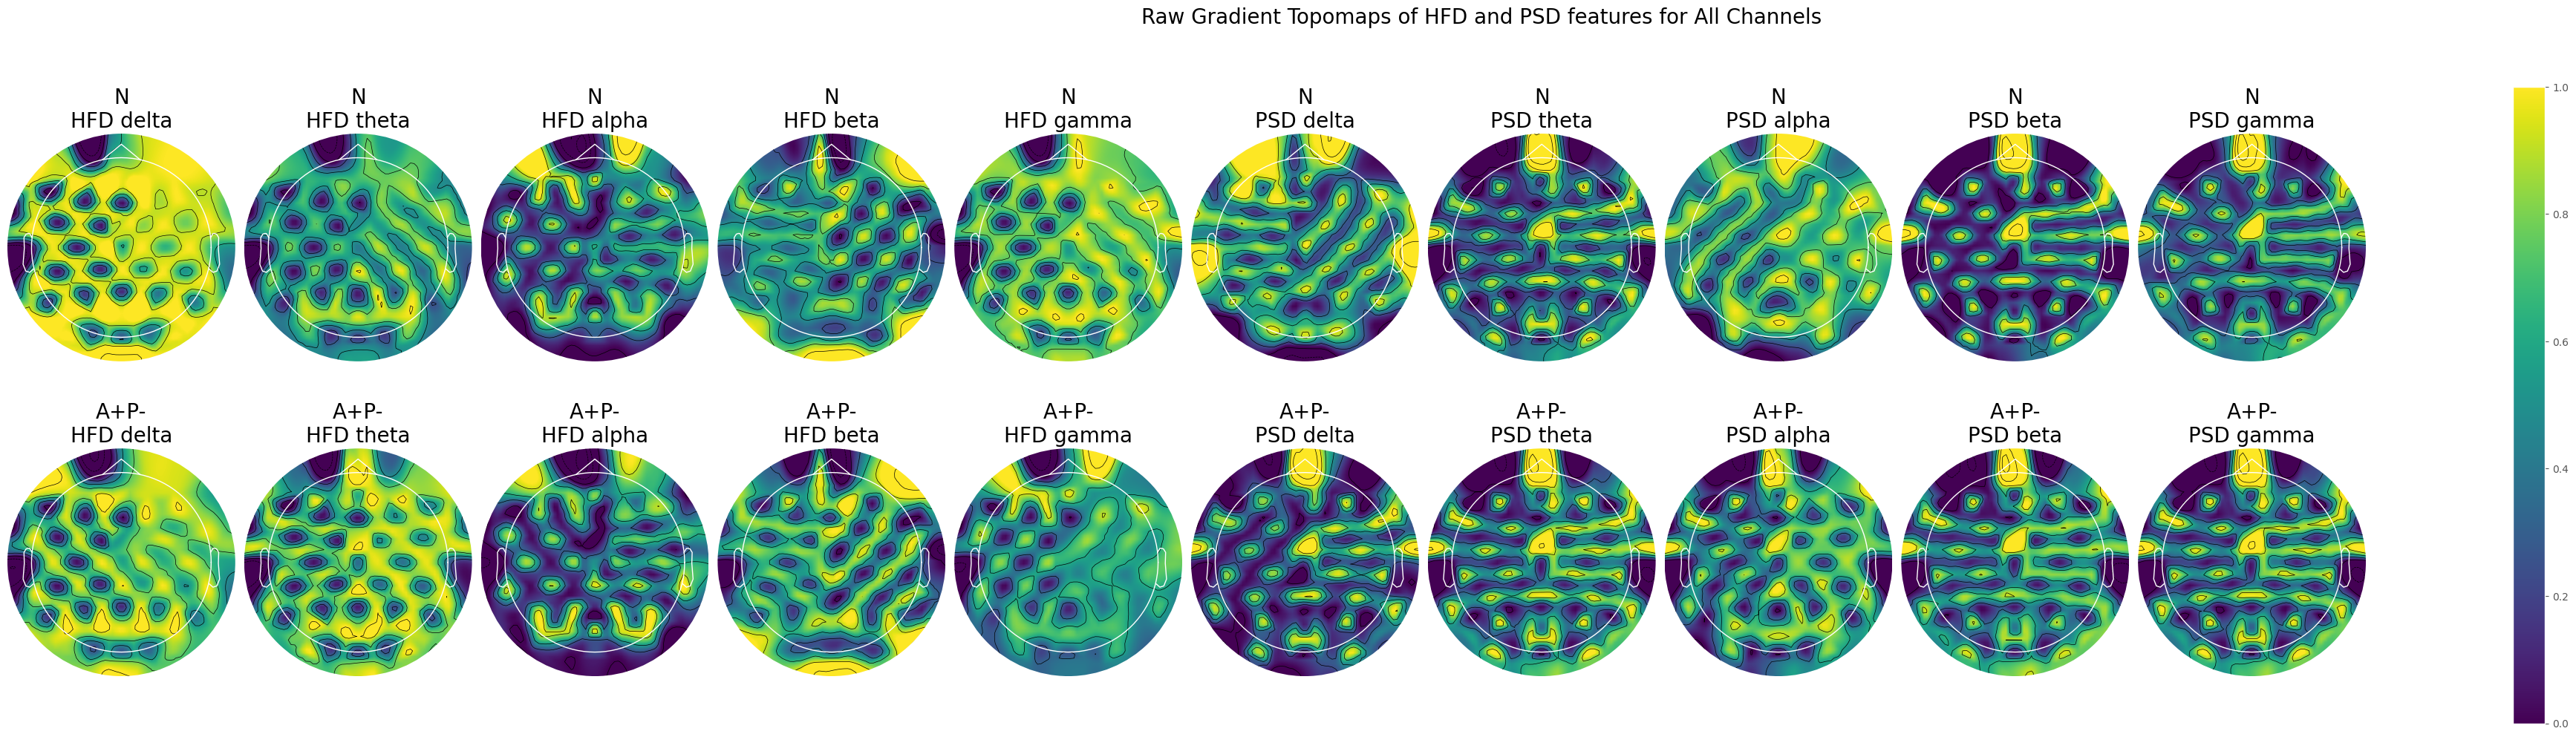

No significant difference for ('N', 'A+P-') at p < 0.001.
Plotting HFD/PSD pairs individually.



/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


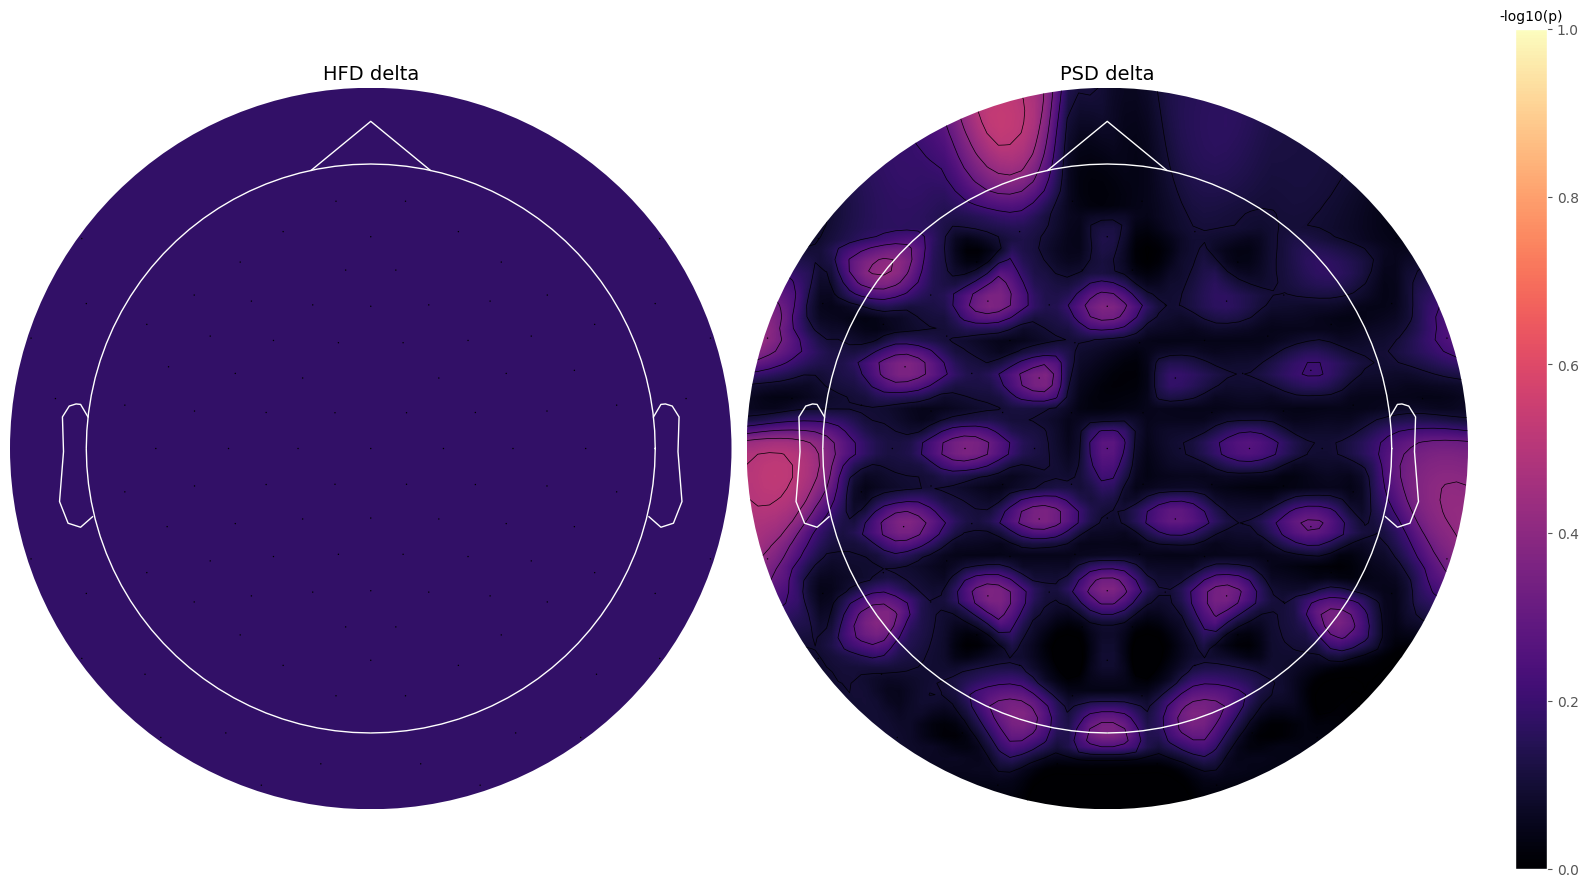

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


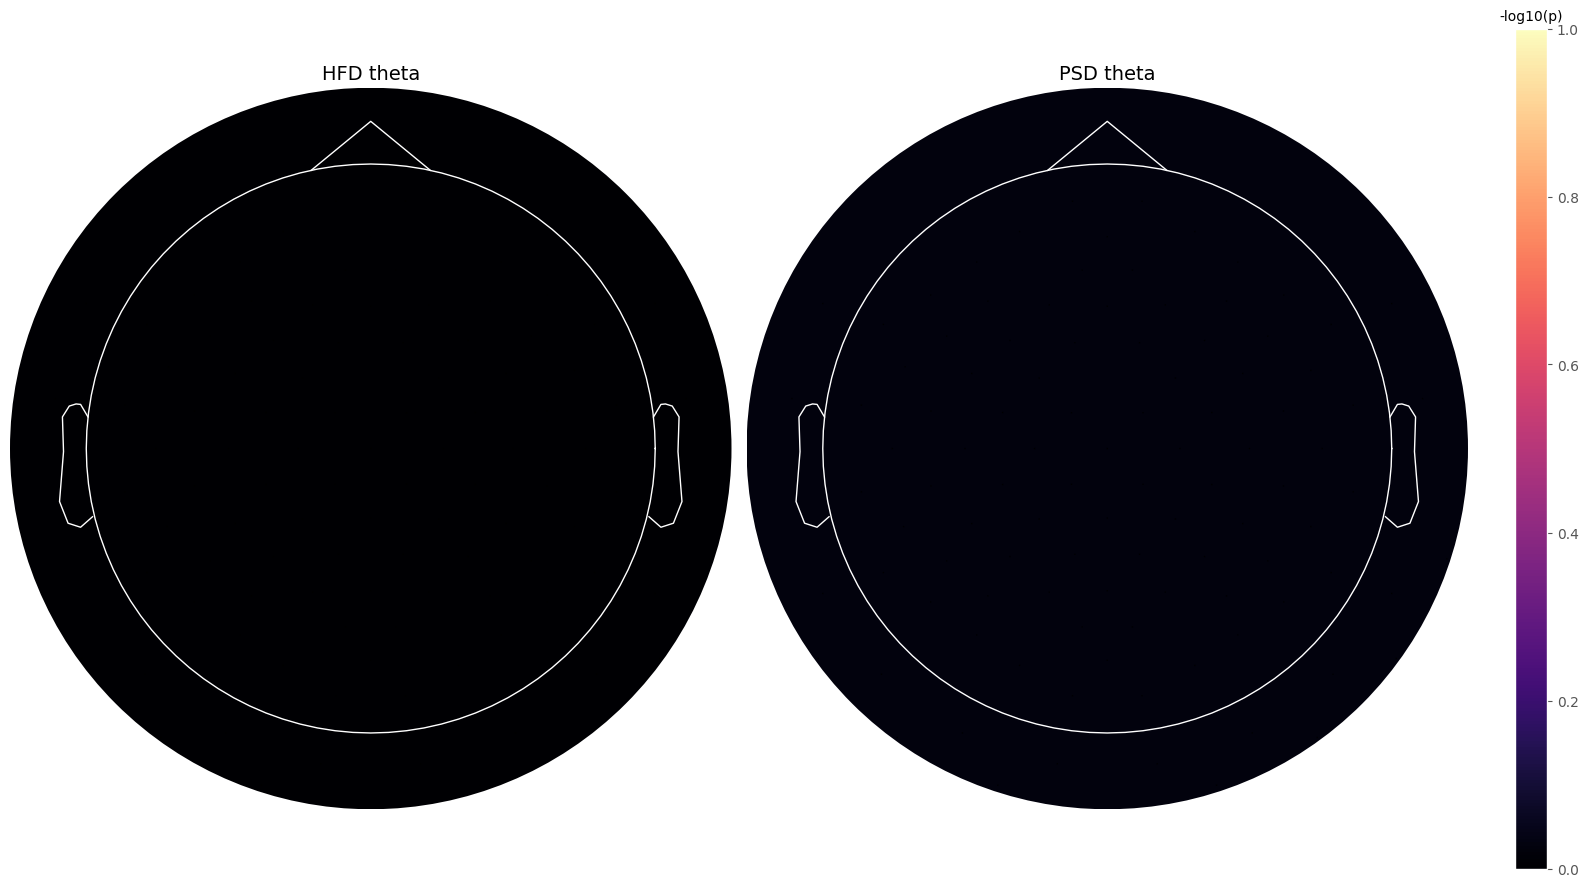

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


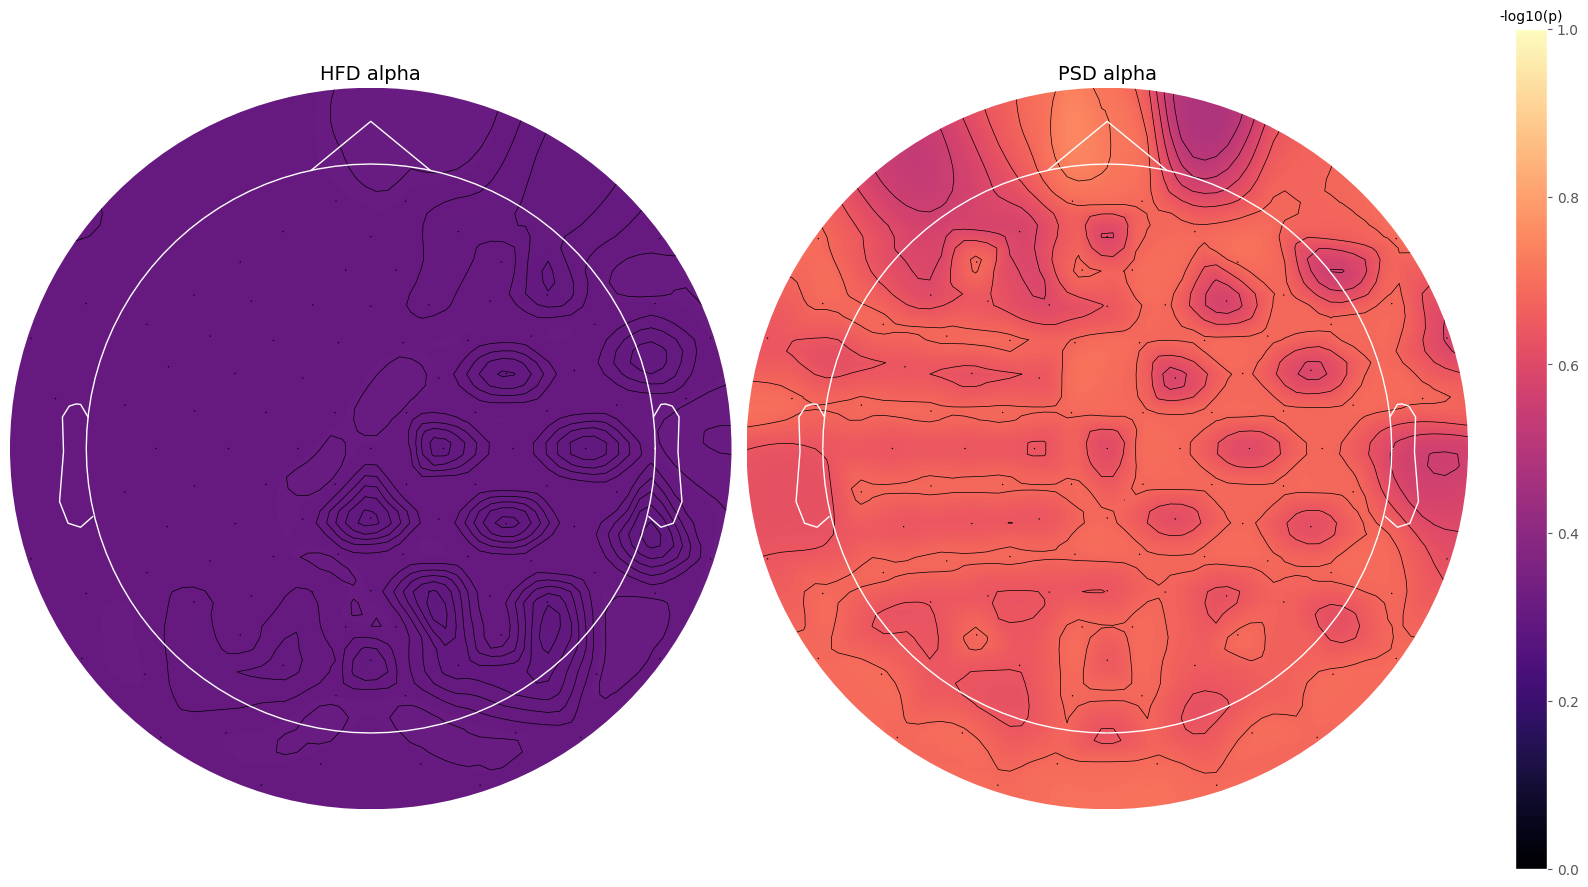

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


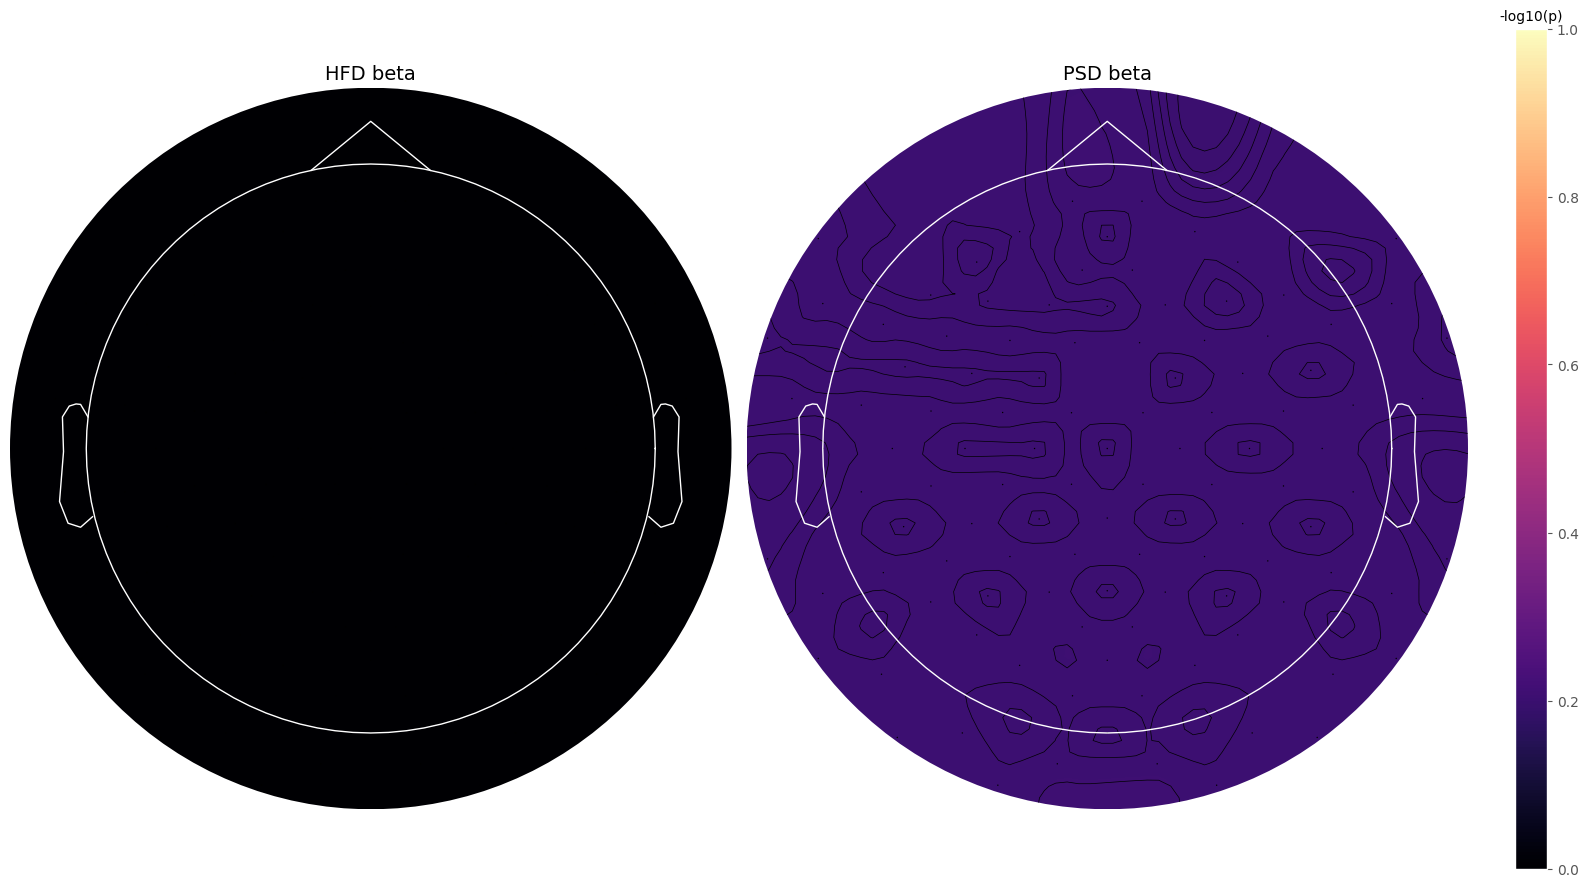

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


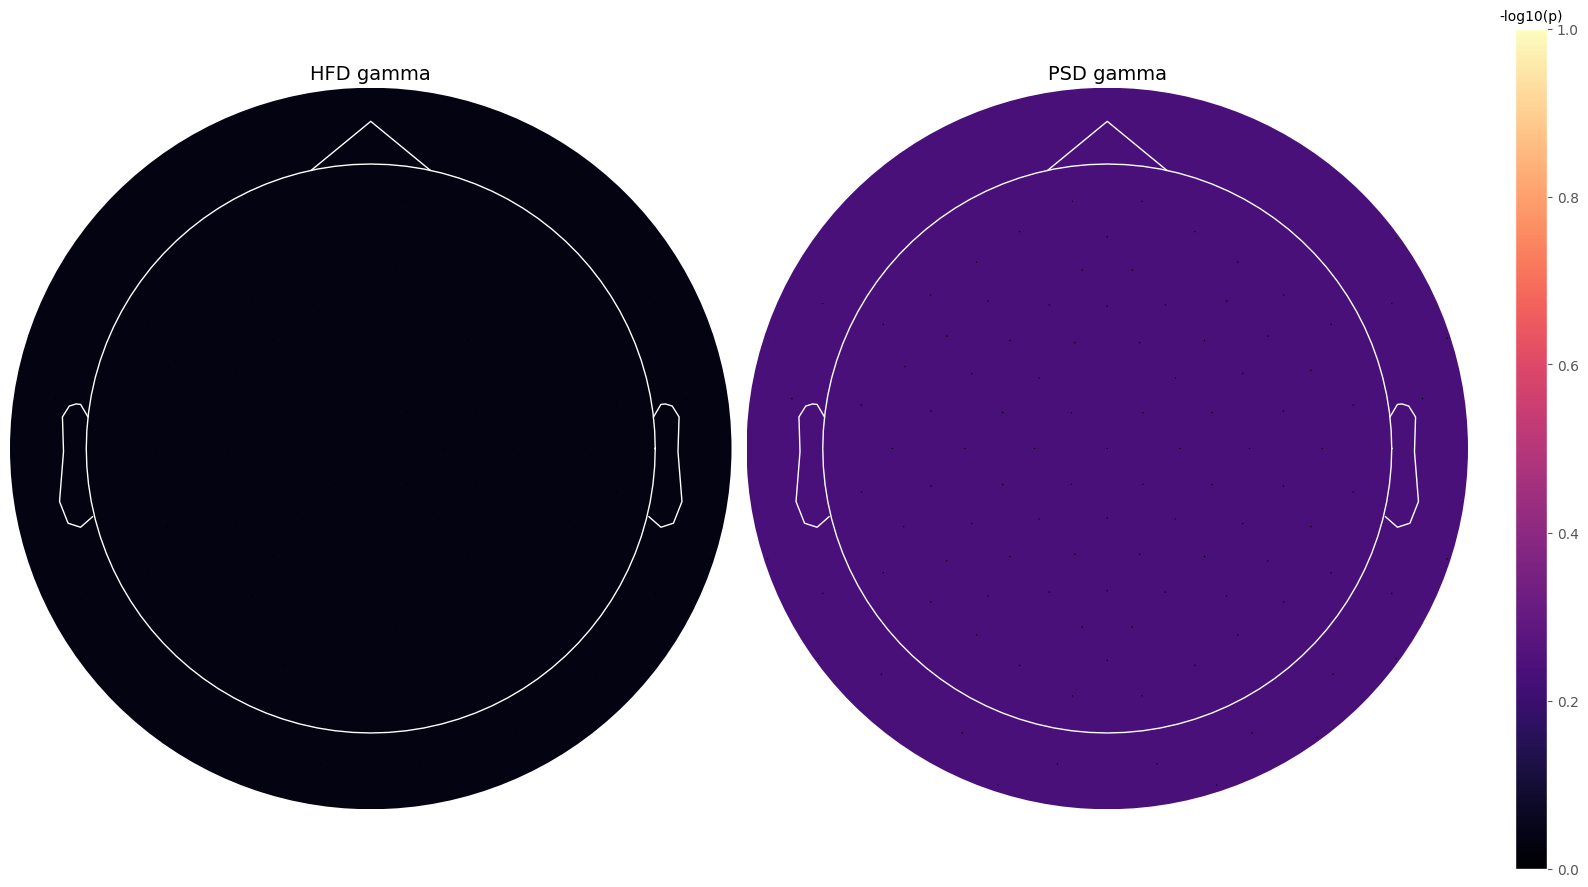

No significant difference for ('N', 'A+P-') at p < 0.05.
Plotting HFD/PSD pairs individually.



/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


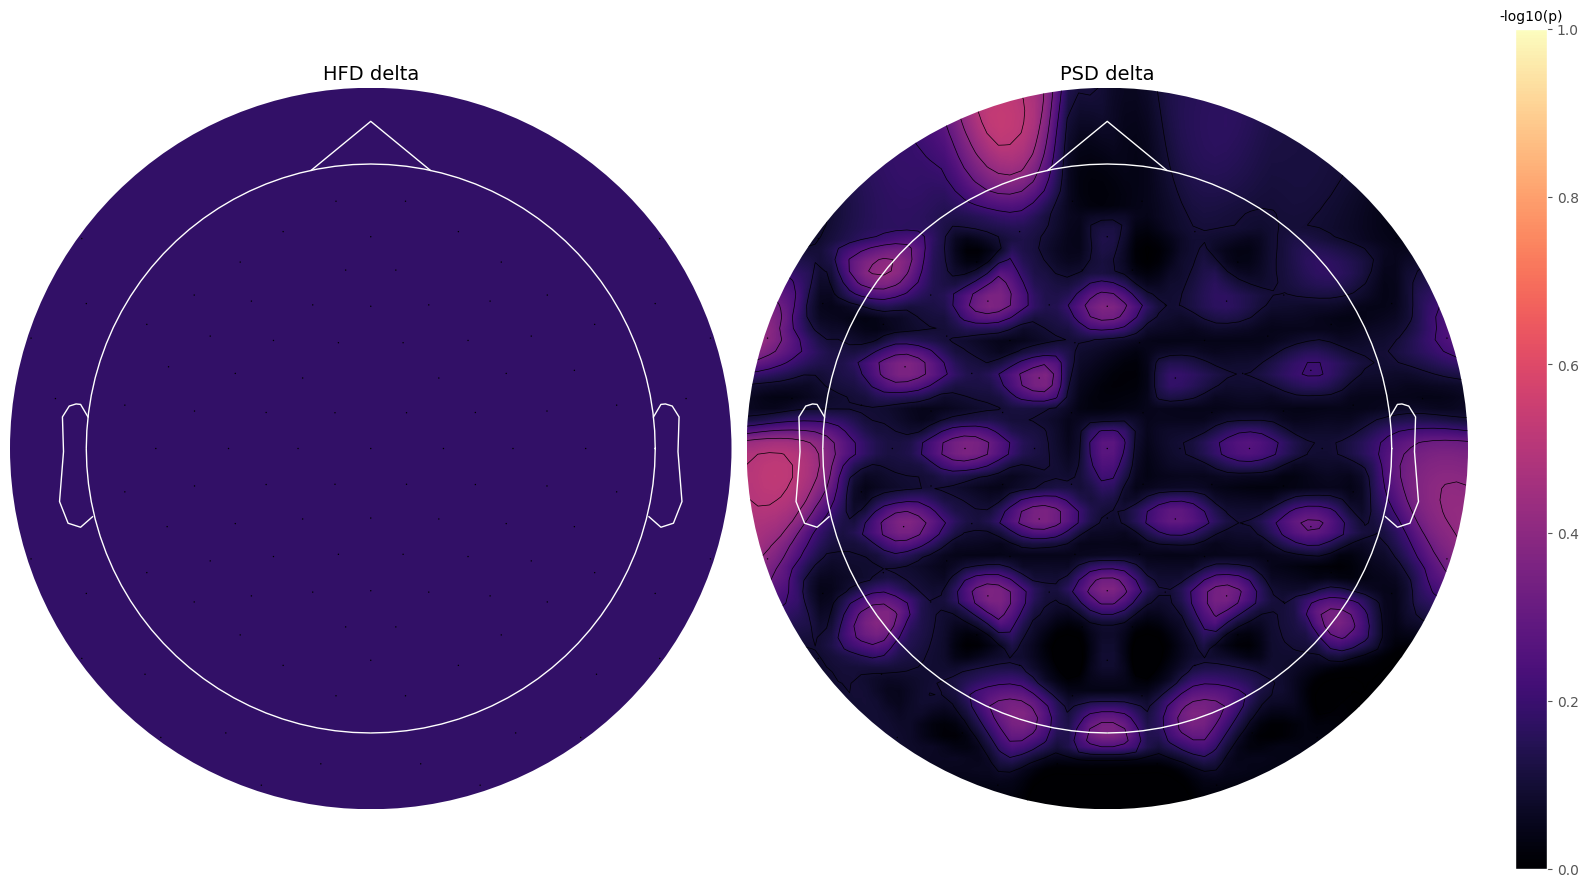

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


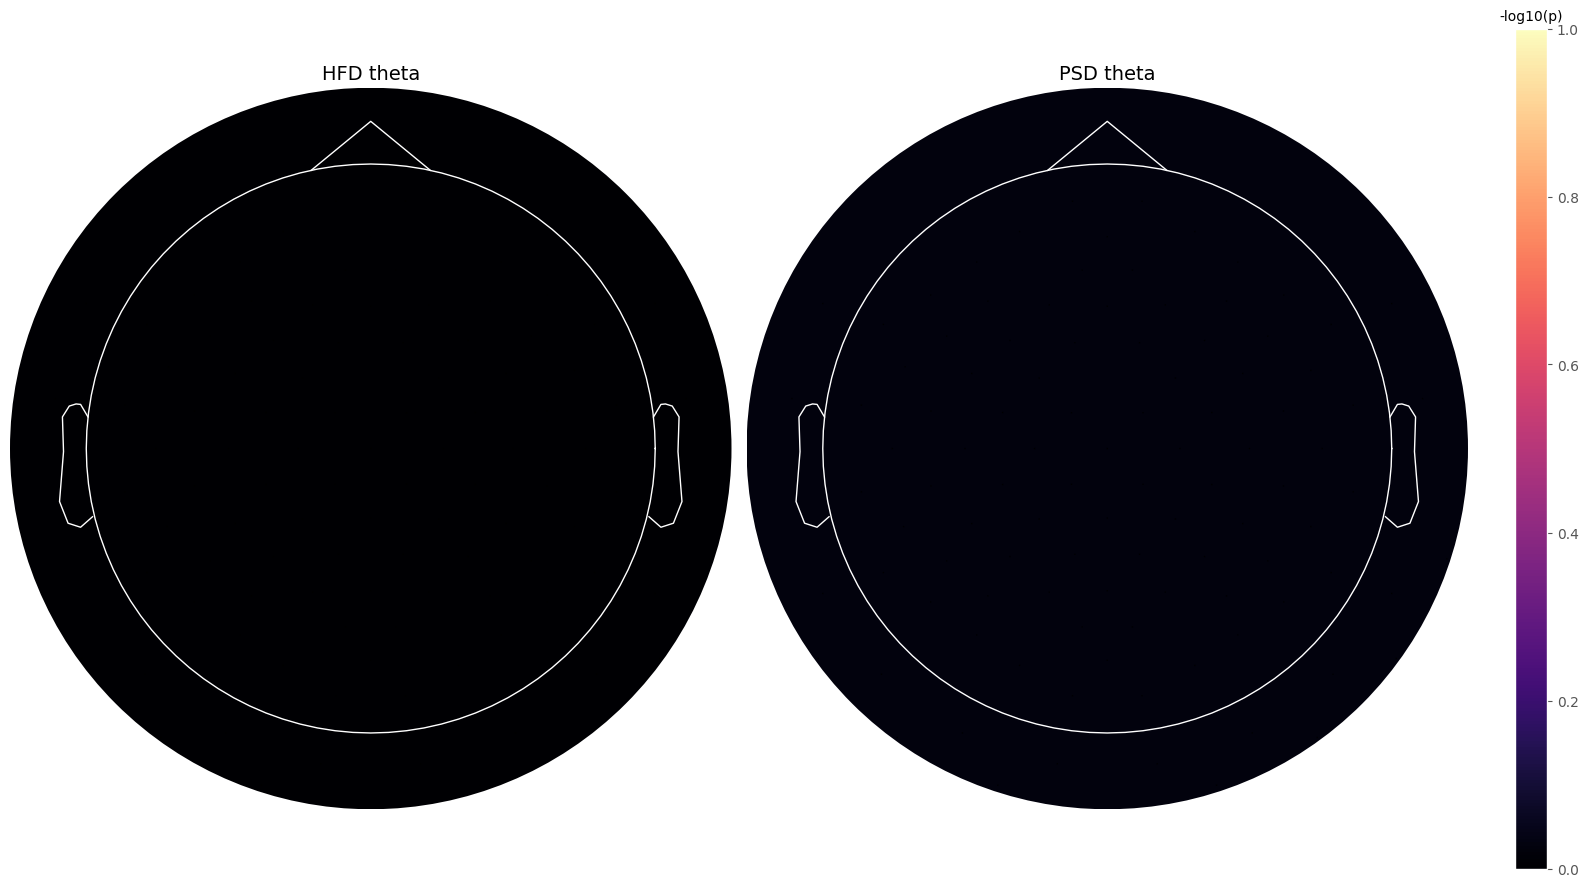

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


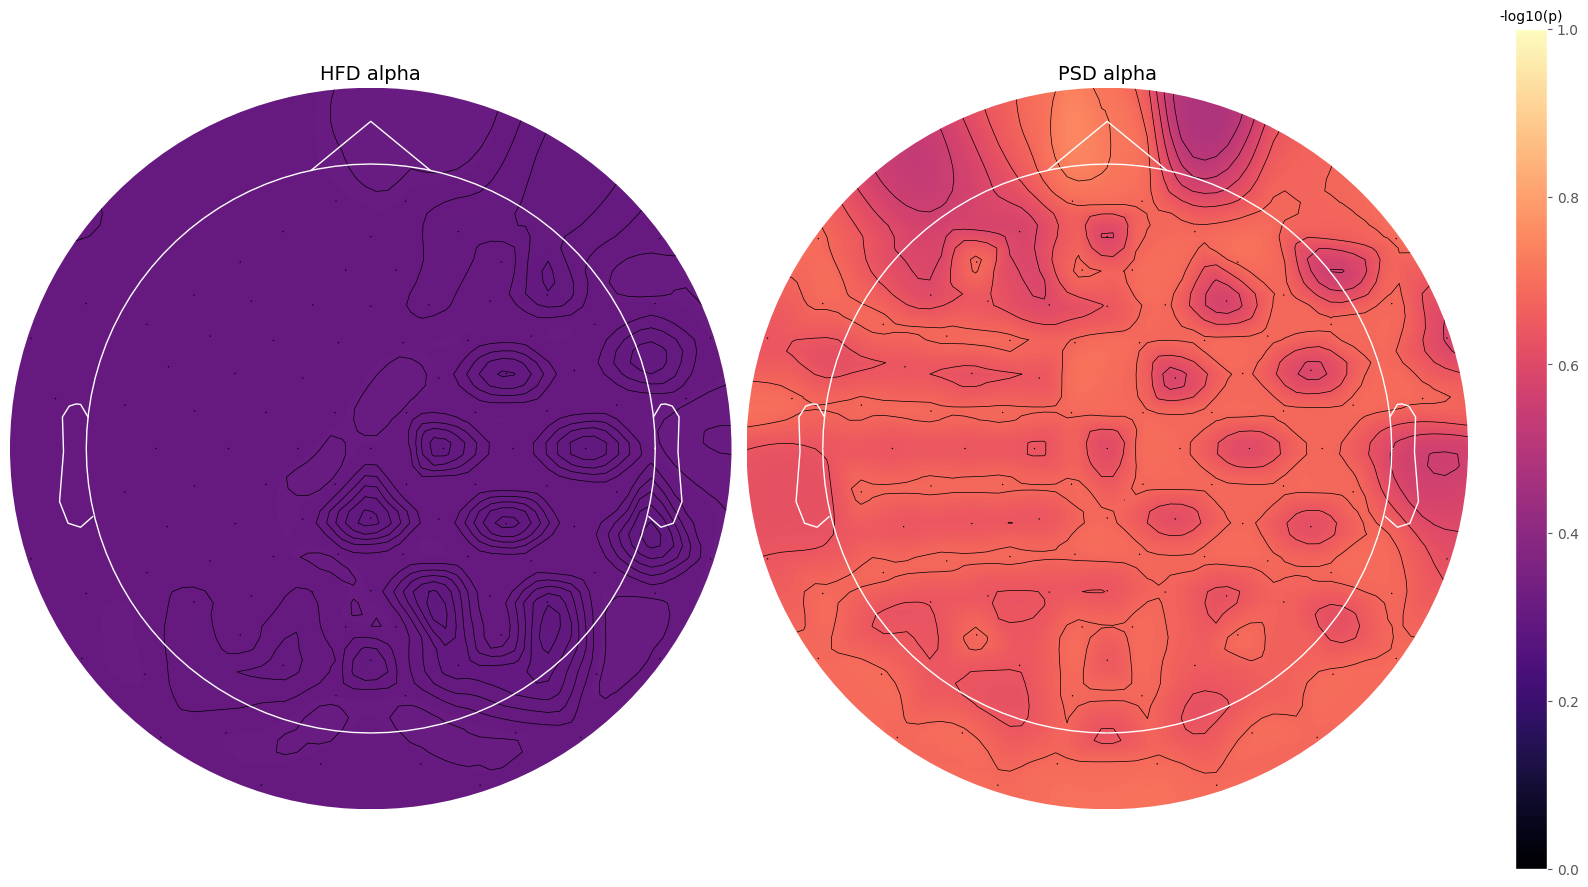

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


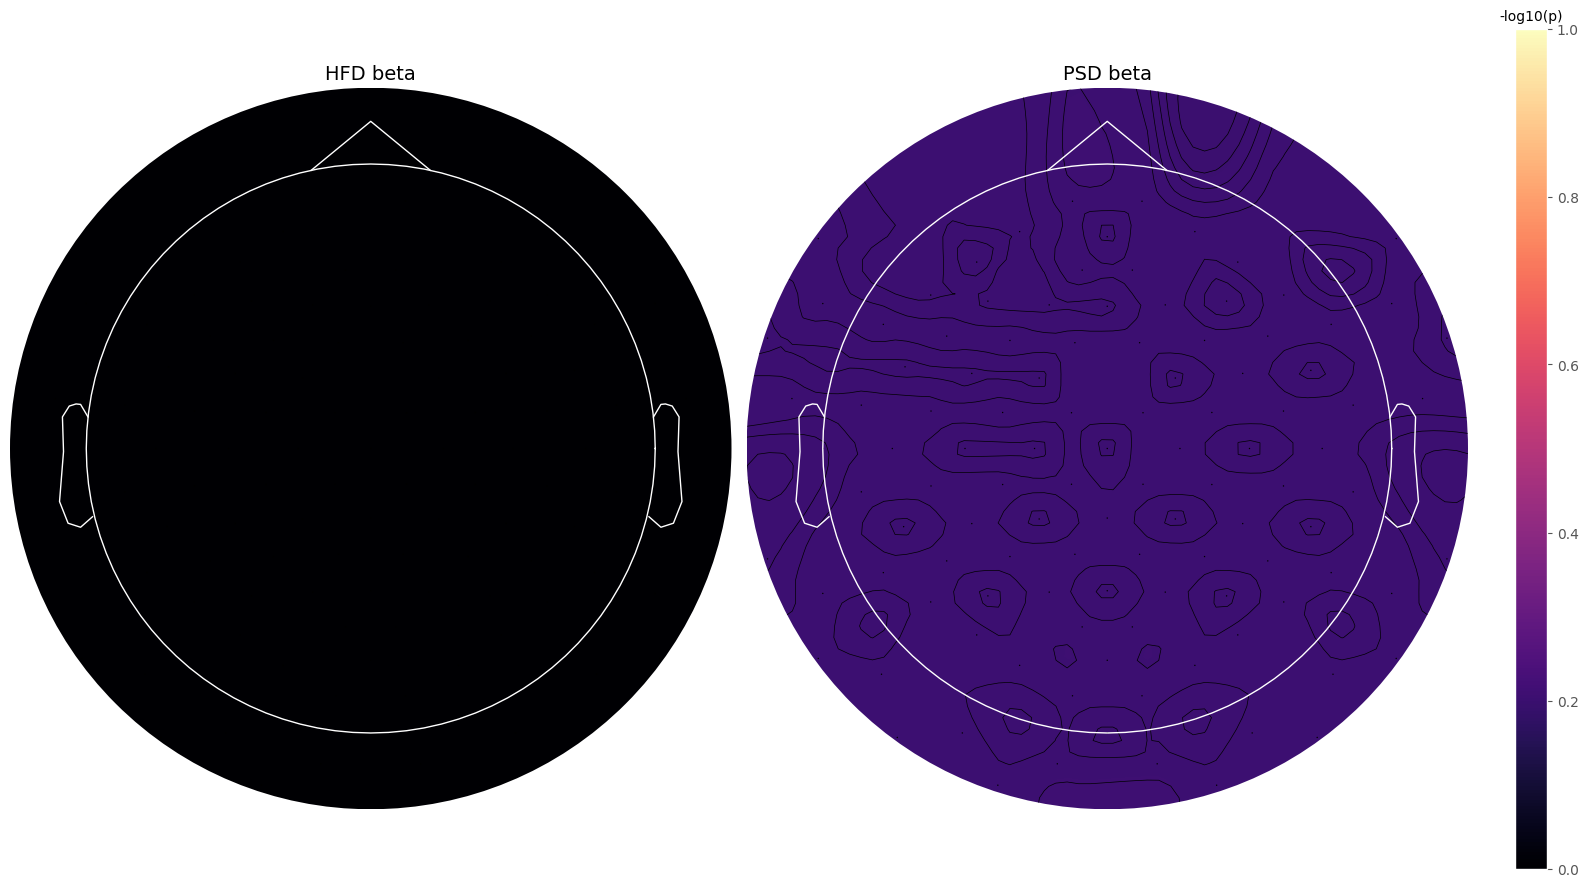

/tmp/ipykernel_1946712/951991038.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


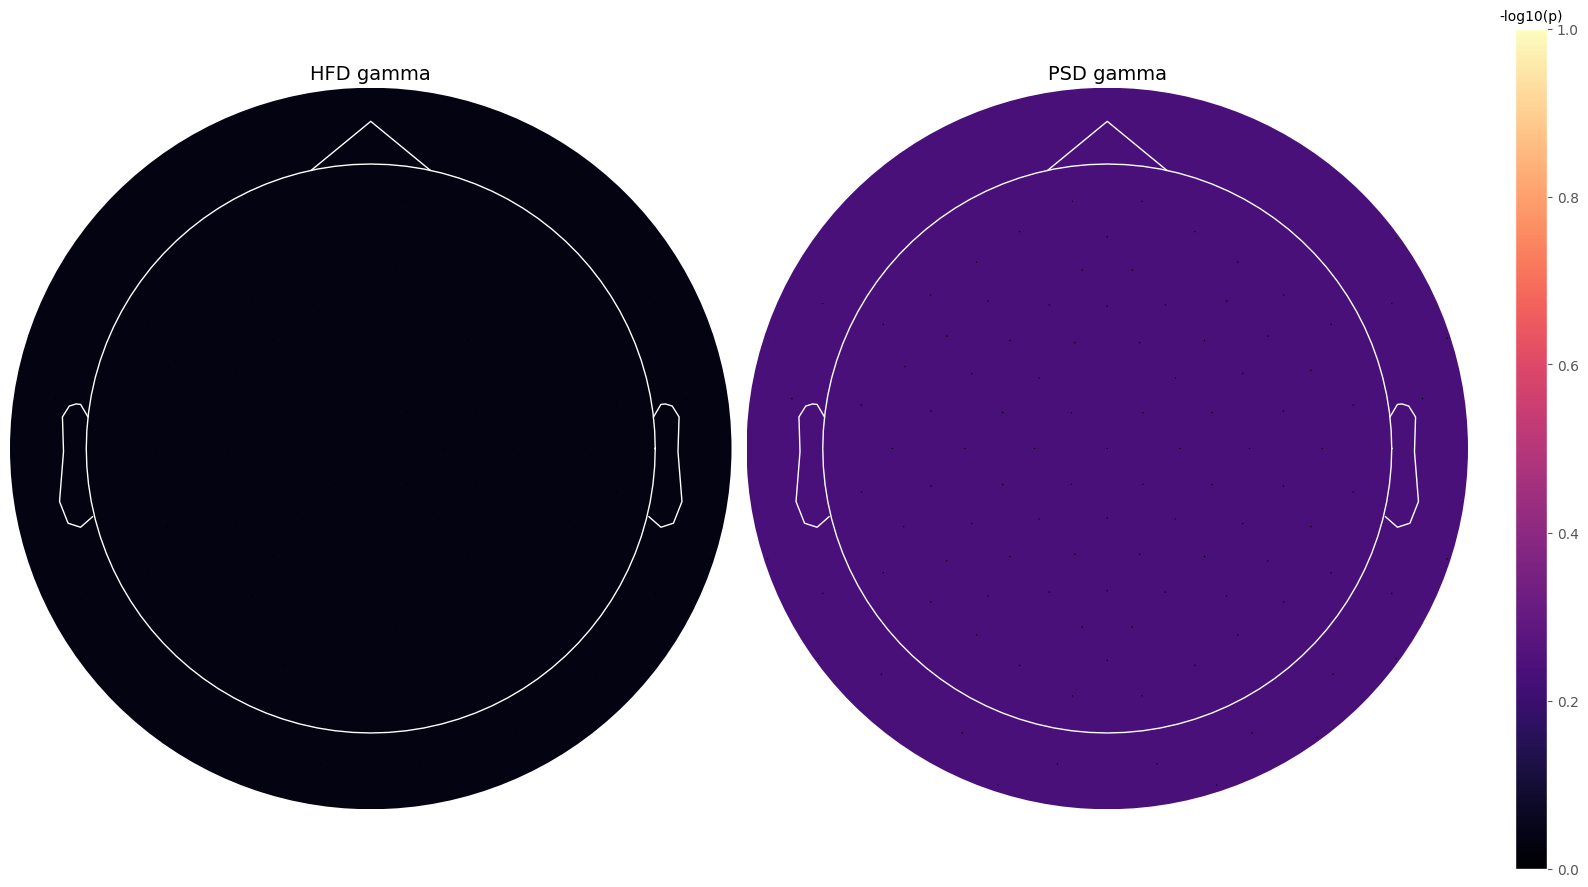

No significant measures found (p < 0.05 after FDR correction). No boxplots to display.


In [19]:
import os
import math
import re
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import mne
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

###############################################################################
# 1) Load raw EEG data (to obtain sensor locations)
###############################################################################
raw_data = mne.io.read_raw_brainvision(
    "/home/s.dharia-ra/Shyamal/PEARL/sub-01/eeg/sub-01_task-rest_eeg.vhdr",
    preload=True
)
channels = raw_data.info['ch_names']  # e.g., 127 channels
n_channels = len(channels)
print(f"Found {n_channels} sensors.")

###############################################################################
# 2) Load participant info and filter by groups
###############################################################################
csv_data = pd.read_csv("filtered_participants.tsv", sep="\t")
filtered_groups = ['N', 'A+P-', 'A+P+']
csv_data = csv_data[csv_data['Group'].isin(filtered_groups)].copy()
group_mapping = {'N': 0, 'A+P-': 1, 'A+P+': 2}
csv_data['Genetic_Risk'] = csv_data['Group'].map(group_mapping)

def get_subject_number(pid):
    try:
        return int(pid.split('-')[1])
    except Exception:
        return None

csv_data['subject_number'] = csv_data['participant_id'].apply(get_subject_number)

# Optionally sample 50 per group if available:
n_sample = 50
csv_data = csv_data.groupby('Group', group_keys=False).apply(
    lambda group: group.sample(n=n_sample, random_state=42) if len(group) >= n_sample else group
).reset_index(drop=True)

###############################################################################
# 3) Load NPZ file with gradients, predictions, and labels
###############################################################################
npz_data = np.load("./final_results_all/single_run_gradients_and_scores_0vs1_final_pool.npz", allow_pickle=True)
grad_dict = npz_data['avg_subject_cnn_features'].item()  # key -> array shape [9, 256, 13, 48]
# grad_dict = npz_data['avg_subject_gradients'].item()  # key -> array shape [9, 256, 13, 48]

preds_array = npz_data['sample_preds']   # shape: (n_subjects, 9)
labels_array = npz_data['sample_labels']   # shape: (n_subjects, 9)
print(f"Original grad_dict has {len(grad_dict)} entries.")

###############################################################################
# 4) Merge duplicates in grad_dict (if keys like "sub-01_run1" exist)
###############################################################################
sub_to_tensors = {}
for k, v in grad_dict.items():
    match = re.search(r"sub-\d+", k)
    real_sub_id = match.group() if match else k
    sub_to_tensors.setdefault(real_sub_id, []).append(v)

final_grad_dict = {}
for sub_id, arr_list in sub_to_tensors.items():
    stack_np = np.stack(arr_list, axis=0)  # shape: [N, 9, 256, 13, 48]
    merged_arr = np.mean(stack_np, axis=0)   # shape: [9, 256, 13, 48]
    final_grad_dict[sub_id] = merged_arr

print(f"After merging duplicates, we have {len(final_grad_dict)} unique subjects in grad_dict.")
grad_dict = final_grad_dict

###############################################################################
# 5) Prepare band indices and define interested (global) columns
###############################################################################
selected_bands = range(10)  # indices 0 to 9 for topomap plotting
selected_bands_names = [
    "HFD delta", "HFD theta", "HFD alpha", "HFD beta", "HFD gamma",
    "PSD delta", "PSD theta", "PSD alpha", "PSD beta", "PSD gamma"
]
# Original list with individual measures (38 columns)
orig_interested_columns = [
    "BDI", "SES", "RPM", "EHI", "NEO_NEU", "NEO_EXT", "NEO_OPE", "NEO_AGR",
    "NEO_CON", "AUDIT", 
    "MINI-COPE_1", "MINI-COPE_2", "MINI-COPE_3", "MINI-COPE_4", "MINI-COPE_5", 
    "MINI-COPE_6", "MINI-COPE_7", "MINI-COPE_8", "MINI-COPE_9", "MINI-COPE_10", 
    "MINI-COPE_11", "MINI-COPE_12", "MINI-COPE_13", "MINI-COPE_14", 
    "CVLT_1", "CVLT_2", "CVLT_3", "CVLT_4", "CVLT_5", "CVLT_6", "CVLT_7", "CVLT_8", 
    "CVLT_9", "CVLT_10", "CVLT_11", "CVLT_12", "CVLT_13", 
    "dementia_history_parents"
]
# For correct family-wise testing, combine MINI-COPE and CVLT columns:
interested_columns = [
    "BDI", "SES", "RPM", "EHI", "NEO_NEU", "NEO_EXT", "NEO_OPE", "NEO_AGR",
    "NEO_CON", "AUDIT", "MINI-COPE", "CVLT", "dementia_history_parents"
]

###############################################################################
# 6) Process each subject’s gradients (using correctly predicted windows only)
###############################################################################
subject_gradient_data = []
subject_global_data   = []
n_samples_per_subject = 9
pred_idx = 0  # used to slice preds_array and labels_array

grad_keys = list(grad_dict.keys())
grad_values = list(grad_dict.values())

for i, key in enumerate(grad_keys):
    # Each subject's gradient array is expected to be [9, 256, 13, 48]
    subject_np = grad_values[i]
    subject_grad_tensor = torch.tensor(subject_np, dtype=torch.float32)
    
    # Extract subject number from key (e.g., "sub-15" or "15.npz" -> 15)
    match = re.search(r"\d+", key)
    subj_num = int(match.group()) if match else i + 1

    # Get predictions & labels for this subject
    chunk_preds = preds_array[pred_idx : pred_idx + n_samples_per_subject]
    chunk_labels = labels_array[pred_idx : pred_idx + n_samples_per_subject]
    print(f"Subject {subj_num} predictions: {chunk_labels}")
    pred_idx += n_samples_per_subject

    preds = torch.tensor(chunk_preds, dtype=torch.long)
    labels = torch.tensor(chunk_labels, dtype=torch.long)

    print(f"Processing subject index {i+1} (key={key}, subject_number={subj_num}) with {n_samples_per_subject} samples:")
    print(f"  Gradient shape = {subject_grad_tensor.shape}, preds shape = {preds.shape}")

    # Majority vote: require at least 5 correct predictions out of 9
    correct_mask = (preds == labels)
    if correct_mask.sum().item() < math.ceil(n_samples_per_subject / 2):
        print(f"Subject {subj_num} skipped due to insufficient correct predictions.")
        continue

    # Keep only correctly predicted windows and average:
    correct_grad_tensor = subject_grad_tensor[correct_mask]  # shape: [n_correct, 256, 13, 48]
    avg_grad = correct_grad_tensor.mean(dim=0)  # now [256, 13, 48]
    avg_grad = avg_grad.mean(dim=0)             # now [13, 48]

    # Upsample from [13, 48] to sensor space: [n_channels, 48]
    heatmap = avg_grad.unsqueeze(0).unsqueeze(0)  # shape: [1, 1, 13, 48]
    print(f"Subject {subj_num} original heatmap shape: {heatmap.shape}")
    upsampled_heatmap = F.interpolate(
        heatmap,
        size=(n_channels, 48),
        mode="bilinear",
        align_corners=False
    ).squeeze()  # shape: [n_channels, 48]
    print(f"Subject {subj_num} upsampled heatmap shape: {upsampled_heatmap.shape}")

    # Record channel-level gradient values (first 10 columns) for topomap plotting
    for ch in range(n_channels):
        for band in selected_bands:
            subject_gradient_data.append({
                "subject_number": subj_num,
                "channel": ch,
                "freq_band": band,
                "gradient_value": upsampled_heatmap[ch, band].item()
            })

    # For global measures, average across channels -> [48]
    global_vector = upsampled_heatmap.mean(dim=0)
    if global_vector.shape[0] >= 48:
        # Use the values corresponding to the original interested columns.
        # Assume the ordering matches the original list.
        global_values = global_vector[10:48]  # 38 values
        # Build dictionary for original measures:
        orig_data = {col: global_values[j].item() for j, col in enumerate(orig_interested_columns)}
        # Compute composite scores:
        mini_cope_cols = [col for col in orig_interested_columns if col.startswith("MINI-COPE")]
        cvlt_cols = [col for col in orig_interested_columns if col.startswith("CVLT")]
        mini_cope_mean = np.mean([orig_data[col] for col in mini_cope_cols])
        cvlt_mean = np.mean([orig_data[col] for col in cvlt_cols])
        composite_data = {
            "BDI": orig_data["BDI"],
            "SES": orig_data["SES"],
            "RPM": orig_data["RPM"],
            "EHI": orig_data["EHI"],
            "NEO_NEU": orig_data["NEO_NEU"],
            "NEO_EXT": orig_data["NEO_EXT"],
            "NEO_OPE": orig_data["NEO_OPE"],
            "NEO_AGR": orig_data["NEO_AGR"],
            "NEO_CON": orig_data["NEO_CON"],
            "AUDIT": orig_data["AUDIT"],
            "MINI-COPE": mini_cope_mean,
            "CVLT": cvlt_mean,
            "dementia_history_parents": orig_data["dementia_history_parents"]
        }
        subject_global_data.append({
            "subject_number": subj_num,
            **composite_data
        })

###############################################################################
# Convert aggregated results into DataFrames
###############################################################################
grad_df = pd.DataFrame(subject_gradient_data)
global_df = pd.DataFrame(subject_global_data)

###############################################################################
# 7) Merge with CSV data for group labels (by subject_number)
###############################################################################
merged_grad_df = pd.merge(
    grad_df,
    csv_data[['subject_number', 'Group']],
    on='subject_number',
    how='inner'
)
global_df = pd.merge(
    global_df,
    csv_data[['subject_number', 'Group']],
    on='subject_number',
    how='inner'
)

print("Merged Gradient DataFrame (first few rows):")
print(merged_grad_df.head())
print("Global Measures DataFrame (first few rows):")
print(global_df.head())

###############################################################################
# 8) Plot Raw Gradient Topomaps (for the first 10 columns)
###############################################################################
plot_groups = ['N', 'A+P-']  # groups of interest
n_plot_groups = len(plot_groups)
n_bands = len(selected_bands)
fig, axes = plt.subplots(nrows=n_plot_groups, ncols=n_bands, figsize=(4 * n_bands, 5 * n_plot_groups))
if n_plot_groups == 1:
    axes = np.expand_dims(axes, axis=0)

for row_idx, group in enumerate(plot_groups):
    for col_idx, band in enumerate(selected_bands):
        ax = axes[row_idx, col_idx]
        subset = merged_grad_df[(merged_grad_df['Group'] == group) & (merged_grad_df['freq_band'] == band)]
        if subset.empty:
            ax.set_title(f"No data: {group}-{selected_bands_names[band]}")
            continue
        # Average gradient over subjects (per channel)
        avg_grad = subset.groupby('channel')['gradient_value'].mean().values
        # do min max scaling
        avg_grad = (avg_grad - avg_grad.min()) / (avg_grad.max() - avg_grad.min())
        im, _ = mne.viz.plot_topomap(
            avg_grad, raw_data.info,
            sensors=False, names=None, show=False, size=10,
            cmap='viridis', axes=ax
        )
        ax.set_title(f"{group}\n{selected_bands_names[band]}", fontsize=20)
fig.suptitle("Raw Gradient Topomaps of HFD and PSD features for All Channels", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.colorbar(im, ax=axes.ravel().tolist())
plt.show()

###############################################################################
# 8) Statistical Analysis on Channel-Level Gradients (t-tests with FDR_BH)
###############################################################################
pairs = [('N', 'A+P-')]
pairwise_grad_pvals = {pair: {} for pair in pairs}
for pair in pairs:
    for band in selected_bands:
        pairwise_grad_pvals[pair][band] = np.full(n_channels, np.nan)

epsilon = 1e-6
merged_grad_df['gradient_value_scaled'] = (
    merged_grad_df.groupby(['channel', 'freq_band'])['gradient_value']
    .transform(lambda x: (x - x.min()) / (x.max() - x.min() + epsilon))
)

# Compute raw p-values with t-tests per channel and frequency band.
for band in selected_bands:
    for ch in range(n_channels):
        subset = merged_grad_df[(merged_grad_df['channel'] == ch) & (merged_grad_df['freq_band'] == band)]
        for pair in pairs:
            group1_data = subset[subset['Group'] == pair[0]]['gradient_value_scaled']
            group2_data = subset[subset['Group'] == pair[1]]['gradient_value_scaled']
            if group1_data.empty or group2_data.empty:
                # If either group is missing for this channel, leave p-value as NaN.
                continue
            # If both groups have almost no variation, assign a p-value of 1.0.
            if group1_data.std() < 1e-6 and group2_data.std() < 1e-6:
                pairwise_grad_pvals[pair][band][ch] = 1.0
            else:
                t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False)
                pairwise_grad_pvals[pair][band][ch] = p_val

# Apply FDR (Benjamini-Hochberg) correction on the p-values per frequency band.
for pair in pairs:
    for band in selected_bands:
        raw_pvals = pairwise_grad_pvals[pair][band]
        valid_mask = ~np.isnan(raw_pvals)
        if np.sum(valid_mask) > 0:
            _, pvals_corrected, _, _ = multipletests(raw_pvals[valid_mask], alpha=0.05, method='fdr_bh')
            raw_pvals[valid_mask] = pvals_corrected
            pairwise_grad_pvals[pair][band] = raw_pvals

# Plot channel-level corrected p-value topomaps at different thresholds.
# Plot channel-level corrected p-value topomaps at different thresholds
mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', markersize=6)
pvalues_masks = [0.001, 0.05]

# Pairs of (HFD, PSD) to plot if no band is significant:
# (0,5) => (HFD delta, PSD delta), (1,6) => (HFD theta, PSD theta), etc.
fallback_pairs = [(0,5), (1,6), (2,7), (3,8), (4,9)]

for pair in pairs:
    for mask_v in pvalues_masks:
        # 1) Identify which bands have any channel with p-value < mask_v
        sig_bands = []
        for band in selected_bands:
            pvals_corrected = pairwise_grad_pvals[pair][band]
            if np.any(pvals_corrected < mask_v):
                sig_bands.append(band)

        # 2) If we found at least one significant band, plot them all on ONE figure
        if sig_bands:
            print(f"Significant bands found for {pair}, p < {mask_v}: {sig_bands}")
            fig, axes = plt.subplots(
                1, 
                len(sig_bands), 
                figsize=(8 * len(sig_bands), 12)  # each band ~8 units wide, 12 high
            )
            if len(sig_bands) == 1:
                axes = [axes]  # ensure list if only one band

            im = None
            for idx, band in enumerate(sig_bands):
                ax = axes[idx]
                pvals_corrected = pairwise_grad_pvals[pair][band]

                # Channels with p < threshold
                mask = pvals_corrected < mask_v
                # Convert p-values to -log10 for visualization
                pvals_transformed = -np.log10(pvals_corrected)

                im, _ = mne.viz.plot_topomap(
                    pvals_transformed,
                    raw_data.info,
                    sensors=True,
                    names=channels,
                    mask=mask,
                    mask_params=mask_params,
                    contours=6,
                    outlines='head',
                    cmap='magma',
                    show=False,
                    size=20,
                    axes=ax,
                    vlim=(0, 1)  # Adjust range if needed
                )
                ax.set_title(f"{selected_bands_names[band]}", fontsize=14)

                # Tweak channel label text
                for txt in ax.texts:
                    txt.set_fontsize(12)
                    x, y = txt.get_position()
                    txt.set_position((x, y + 0.005))
                    txt.set_zorder(10)

            # Colorbar for the figure
            fig.subplots_adjust(right=0.92)
            cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
            cbar = fig.colorbar(im, cax=cbar_ax)
            cbar.ax.set_title("-log10(p)", fontsize=10)

            # fig.suptitle(f"{pair} - p < {mask_v}", fontsize=16)
            plt.tight_layout(rect=[0, 0, 0.93, 1])
            plt.show()

        else:
            # 3) If NO bands are significant, produce multiple figures:
            #    one figure per (HFD, PSD) pair
            print(f"No significant difference for {pair} at p < {mask_v}.")
            print("Plotting HFD/PSD pairs individually.\n")

            for (hfd_band, psd_band) in fallback_pairs:
                # We'll do 2 subplots side by side, each ~8 wide => total 16 width
                fig, axes = plt.subplots(1, 2, figsize=(8 * 2, 12))  # (16, 12)

                for idx, band in enumerate([hfd_band, psd_band]):
                    ax = axes[idx]
                    pvals_corrected = pairwise_grad_pvals[pair][band]

                    # Even in fallback scenario, we can still show the masked channels if p < mask_v
                    mask = pvals_corrected < mask_v
                    pvals_transformed = -np.log10(pvals_corrected)

                    im, _ = mne.viz.plot_topomap(
                        pvals_transformed,
                        raw_data.info,
                        sensors=True,
                        names=channels,
                        mask=mask,
                        mask_params=mask_params,
                        contours=6,
                        outlines='head',
                        cmap='magma',
                        show=False,
                        size=20,
                        axes=ax,
                        vlim=(0, 1)
                    )
                    ax.set_title(f"{selected_bands_names[band]}", fontsize=14)

                    for txt in ax.texts:
                        txt.set_fontsize(12)
                        x, y = txt.get_position()
                        txt.set_position((x, y + 0.005))
                        txt.set_zorder(10)

                # One colorbar for both subplots
                fig.subplots_adjust(right=0.92)
                cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
                cbar = fig.colorbar(im, cax=cbar_ax)
                cbar.ax.set_title("-log10(p)", fontsize=10)

                # fig.suptitle(f"{pair} fallback - p < {mask_v}", fontsize=16)
                plt.tight_layout(rect=[0, 0, 0.93, 1])
                plt.show()


###############################################################################
# 9) Global Measures: Plot Box Plots for Average Global Gradients per Group
#     (ONLY for measures that are significant after FDR correction)
###############################################################################
plt.style.use('ggplot')
group_means = global_df.groupby('Group')[interested_columns].mean()
# We compare groups 'N' and 'A+P+'
group_means_subset = group_means.loc[['N', 'A+P-']]
all_measures = group_means_subset.columns 

# Perform t-tests for each measure and apply FDR_BH correction across all measures:
raw_pvals_global = []
for measure in all_measures:
    data_N = global_df.loc[global_df['Group'] == 'N', measure]
    data_APplus = global_df.loc[global_df['Group'] == 'A+P-', measure]
    _, p_val = ttest_ind(data_N, data_APplus, equal_var=False)
    raw_pvals_global.append(p_val)

reject_global, pvals_corrected_global, _, _ = multipletests(raw_pvals_global, alpha=0.05, method='fdr_bh')

# Filter for only significant measures (p < 0.05)
sig_threshold = 0.06
significant_indices = [i for i, p in enumerate(pvals_corrected_global) if p < sig_threshold]

if len(significant_indices) == 0:
    print("No significant measures found (p < 0.05 after FDR correction). No boxplots to display.")
else:
    significant_measures = [all_measures[i] for i in significant_indices]
    corrected_pvals_sig = [pvals_corrected_global[i] for i in significant_indices]
    n_measures = len(significant_measures)
    indices = np.arange(n_measures)
    offset = 0.2
    positions = []
    box_data = []

    for i, measure in enumerate(significant_measures):
        pos_N = i - offset
        pos_APplus = i + offset
        positions.extend([pos_N, pos_APplus])
        box_data.append(global_df.loc[global_df['Group'] == 'N', measure])
        box_data.append(global_df.loc[global_df['Group'] == 'A+P-', measure])

    fig, ax = plt.subplots(figsize=(12, 6))
    bp = ax.boxplot(box_data, positions=positions, widths=0.25, patch_artist=True)

    color_N = "#4c72b0"      # Blue
    color_APplus = "#dd8452"   # Orange

    for j, box in enumerate(bp['boxes']):
        if j % 2 == 0:
            box.set_facecolor(color_N)
            box.set_edgecolor('black')
            box.set_alpha(0.8)
        else:
            box.set_facecolor(color_APplus)
            box.set_edgecolor('black')
            box.set_alpha(0.8)

    for whisker in bp['whiskers']:
        whisker.set(color='gray', linewidth=1.5)
    for cap in bp['caps']:
        cap.set(color='gray', linewidth=1.5)
    for median in bp['medians']:
        median.set(color='white', linewidth=1)

    ax.set_xticks(indices)
    ax.set_xticklabels(significant_measures, rotation=45, ha='right', fontsize=12)
    ax.set_ylabel('Global Gradient Value', fontsize=14)
    patch_N = mpatches.Patch(color=color_N, label='N')
    patch_APplus = mpatches.Patch(color=color_APplus, label='A+P-')
    ax.legend(handles=[patch_N, patch_APplus], loc='lower right', bbox_to_anchor=(1.05, 1), fontsize=12)

    # Annotate significance differences on the plot:
    for i, measure in enumerate(significant_measures):
        data_N = global_df.loc[global_df['Group'] == 'N', measure]
        data_APplus = global_df.loc[global_df['Group'] == 'A+P-', measure]
        p_val = corrected_pvals_sig[i]
        if p_val < 0.001:
            sig_text = '***'
        elif p_val < 0.01:
            sig_text = '**'
        elif p_val < 0.05:
            sig_text = '*'
        else:
            sig_text = 'n.s.'
        
        y1 = data_N.max()
        y2 = data_APplus.max()
        y_max = max(y1, y2)
        line_offset = 0.05 * y_max
        text_offset = 0.02 * y_max
        x1 = indices[i] - offset
        x2 = indices[i] + offset
        y = y_max + line_offset
        ax.plot([x1, x1, x2, x2],
                [y, y + line_offset, y + line_offset, y],
                lw=1.5, color='black')
        ax.text((x1 + x2) / 2, y + line_offset + text_offset,
                sig_text, ha='center', va='bottom', color='black', fontsize=10)
    plt.tight_layout()
    plt.show()

###############################################################################
# 10) Confusion Matrix Plots
###############################################################################
# def make_confusion_matrix(cm, figsize=(8,6), cbar=True, xyplotlabels=True, title='', categories=None, sum_stats=True):
#     import seaborn as sns
#     fig, ax = plt.subplots(figsize=figsize)
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=cbar,
#                 xticklabels=categories, yticklabels=categories, ax=ax)
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('Actual')
#     ax.set_title(title)
#     plt.show()
#
# data = np.load("./final_results_all/single_run_gradients_and_scores_1vs2.npz", allow_pickle=True)
# if 'subject_confusion' in data:
#     data_conf = data['subject_confusion']
#     make_confusion_matrix(data_conf, figsize=(8, 6), cbar=False, xyplotlabels=True,
#                           title="", categories=['A+P-', 'A+P+'], sum_stats=False)
# if 'sample_confusion' in data:
#     data_conf = data['sample_confusion']
#     make_confusion_matrix(data_conf, figsize=(8, 6), cbar=False, xyplotlabels=True,
#                           title="", categories=['N', 'A+P+'], sum_stats=False)
